# 1. Fonctions

## import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score


plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

## Fonctions

In [2]:
import h5py
import numpy as np


def load_data():
    train_dataset = h5py.File('datasets/trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('datasets/testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    # print(Z.min())
    A = 1 / (1 + np.exp(-Z))
    return A

In [5]:
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [8]:
def predict(X, W, b,Show=False):
    A = model(X, W, b)
    if Show == True:
        print(A)
    return A >= 0.5

In [9]:
from tqdm import tqdm
import keyboard

In [10]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100, W=0, b=0):
    if isinstance(W, (int, float)) and W == 0 and isinstance(b, (int, float)) and b == 0:
        W, b = initialisation(X_train)
    elif isinstance(W, np.ndarray) and W.size == 0:  # Vérifie si W est un tableau vide
        W, b = initialisation(X_train)
    

    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        A = model(X_train, W, b)

        if i % 10  == 0:
            # Train
            train_loss.append(log_loss(A, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Test
            A_test = model(X_test, W, b)
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # mise a jour
        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)
        if keyboard.is_pressed("*") :
            print("Barre d'espace détectée. Arrêt du code. return W, b")
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(train_loss, label='train loss')
            plt.plot(test_loss, label='test loss')
            plt.legend()
            plt.subplot(1, 2, 2)
            plt.plot(train_acc, label='train acc')
            plt.plot(test_acc, label='test acc')
            plt.legend()
            plt.show()
            return (W, b)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()

    return (W, b)

In [11]:
def predict_with_probabilities(X, W, b, image_size=(64, 64)):
    """
    Affiche toutes les images reconstruites avec leur prédiction, probabilité (confiance), et vrai label.
    Arguments:
    - X : numpy.ndarray, les données d'entrée aplaties (2D).
    - y : numpy.ndarray, les vrais labels (1D ou 2D).
    - W : numpy.ndarray, les poids du modèle.
    - b : float, le biais du modèle.
    - image_size : tuple, dimensions originales des images (par défaut (64, 64)).

    Retourne :
    - None
    """
    # Étape 1 : Calcul des probabilités
    A = model(X, W, b)  # Probabilités calculées par le modèle
    y_pred = (A >= 0.5).astype(int)  # Prédictions binaires

    # Étape 2 : Reconstruction des images
    num_images = X.shape[0]  # Afficher toutes les images
    images = X.reshape((-1, *image_size))  # Reconstruire les images

    # Étape 3 : Affichage des images avec prédictions, probabilité et vrai label
    plt.figure(figsize=(25, 25))  # Grande taille pour afficher toutes les images
    for i in range(100):
        plt.subplot(10, 10, i + 1)  # Organiser les images dans une grille (ici 10x10)
        plt.imshow(images[i], cmap='gray')  # Affiche l'image reconstruite
        
        # Calcul de la confiance pour chaque classe (chien ou chat)
        confidence = A[i][0]  # Probabilité de la classe prédite    
        
        if y_pred[i] == 1:  # Prédiction "Chien"
            predicted_label = "Chien"
            confidence_percent = confidence * 100  # 80% ou plus si c'est un chien
            confidence_label = f"{confidence_percent:.1f}% Chien"
        else:  # Prédiction "Chat"
            predicted_label = "Chat"
            confidence_percent = (1 - confidence) * 100  # 80% ou plus si c'est un chat
            confidence_label = f"à {confidence_percent:.1f}% Chat"

        # Afficher le titre avec la prédiction et la confiance
        plt.title(f"Confiance: {confidence_label}")
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()



# Application Chat vs Chien

In [12]:
X_train, y_train, X_test, y_test = load_data()

In [13]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(24998, 64, 64)
(24998, 1)
(array([0, 1], dtype=int64), array([12499, 12499], dtype=int64))


In [14]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(164, 64, 64)
(164, 1)
(array([0, 1], dtype=int64), array([87, 77], dtype=int64))


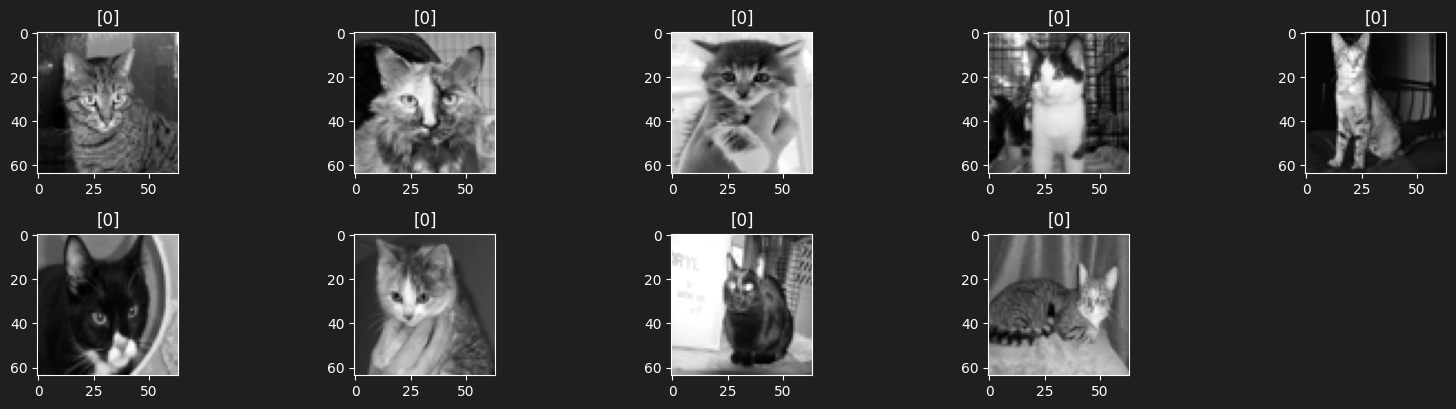

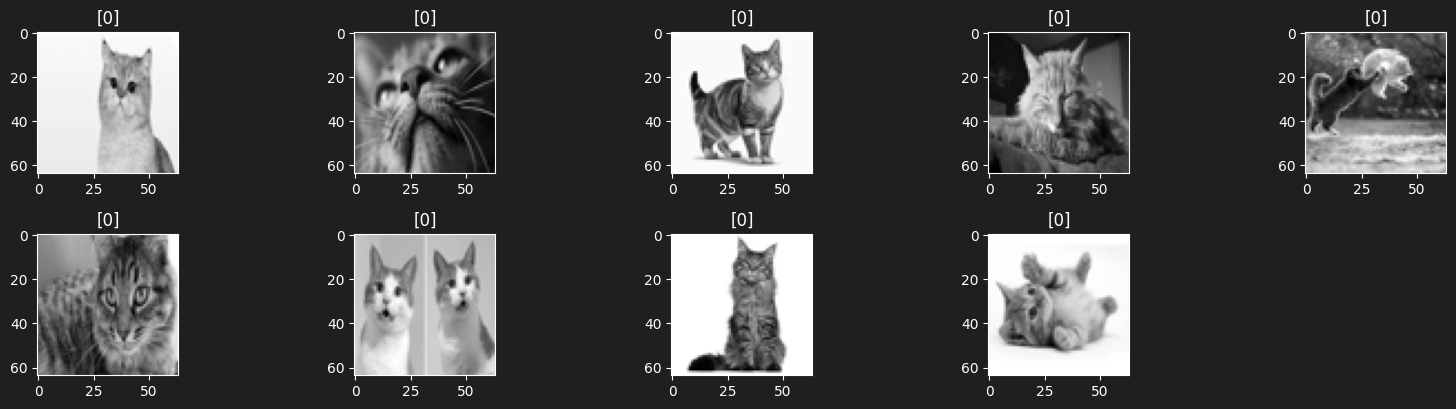

In [15]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):

    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
for i in range(1, 10):

    plt.subplot(4, 5, i)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(y_test[i])
    plt.tight_layout()
plt.show()



# Entrainement du Modele

In [16]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_train_reshape.shape

(24998, 4096)

In [17]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()
X_test_reshape.shape

(164, 4096)

## Init du model avec des valeur deja existantes

In [18]:
import numpy as np
import json

# Demander à l'utilisateur de spécifier un fichier ou d'utiliser la valeur par défaut
fichier_input = input("Entrez le nom du fichier (par défaut : valeurs.json) : ").strip()
folder = "WbJson"
print(folder + '/' + fichier_input + ".json")
if not fichier_input:
    fichier_input = "valeurs"  # Utiliser la valeur par défaut

try:
    # Lecture des données depuis le fichier JSON
    with open(folder + '/' + fichier_input + ".json", "r") as fichier:
        valeurs_lues = json.load(fichier)

    # Reconstruire les objets à partir des données JSON
    W = np.array(valeurs_lues["W"])  # Convertir la liste en tableau NumPy
    b = valeurs_lues["b"]  # Extraire la valeur de b directement

    # Vérification
    print("W initialisé :", W)
    print("b initialisé :", b)

except FileNotFoundError:
    print(f"Erreur : Le fichier '{fichier_input}' est introuvable.")
except json.JSONDecodeError:
    print(f"Erreur : Le fichier '{fichier_input}' n'est pas un fichier JSON valide.")
except KeyError as e:
    print(f"Erreur : Clé manquante dans le fichier JSON - {e}")


WbJson/.json
Erreur : Le fichier 'WbJson/valeurs.json' est introuvable.


###     train fast               

In [19]:
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate = 0.01 , n_iter=10000000,W=W,b=b)  

NameError: name 'W' is not defined

In [ ]:
import numpy as np
import json
# Demande à l'utilisateur
while True:
    reponse = input("Tu veux sauvegarder W et b ? (o/oui/n/non) : ").strip().lower() 
    if reponse in ["o", "oui"]:
        print("Sauvegarde de W et b en cours...")
                
        # Convertir toutes les données en types JSON compatibles
        valeurs = {
            "W": W.tolist(),  # Convertir le tableau NumPy en liste
            "b": b.tolist()     # S'assurer que b est un float Python
        }

        # Inspecter les données avant de sérialiser
        for key, value in valeurs.items():
            print(f"Clé : {key}, Type : {type(value)}")

        # Sauvegarder dans un fichier JSON
        try:
            with open("WbJson/valeurs.json", "w") as fichier:
                json.dump(valeurs, fichier, indent=4)  # Écrire le dictionnaire
            print("Les valeurs ont été enregistrées dans le fichier 'valeurs.json'.")
        except TypeError as e:
            print(f"Erreur de sérialisation JSON : {e}")        
        break
    elif reponse in ["n", "non"]:
        print("Sauvegarde annulée.")
        break
    else:
        print("Réponse invalide. Veuillez répondre par 'o', 'oui', 'n', ou 'non'.")




Sauvegarde de W et b en cours...
Clé : W, Type : <class 'list'>
Clé : b, Type : <class 'list'>
Les valeurs ont été enregistrées dans le fichier 'valeurs.json'.


# Predict

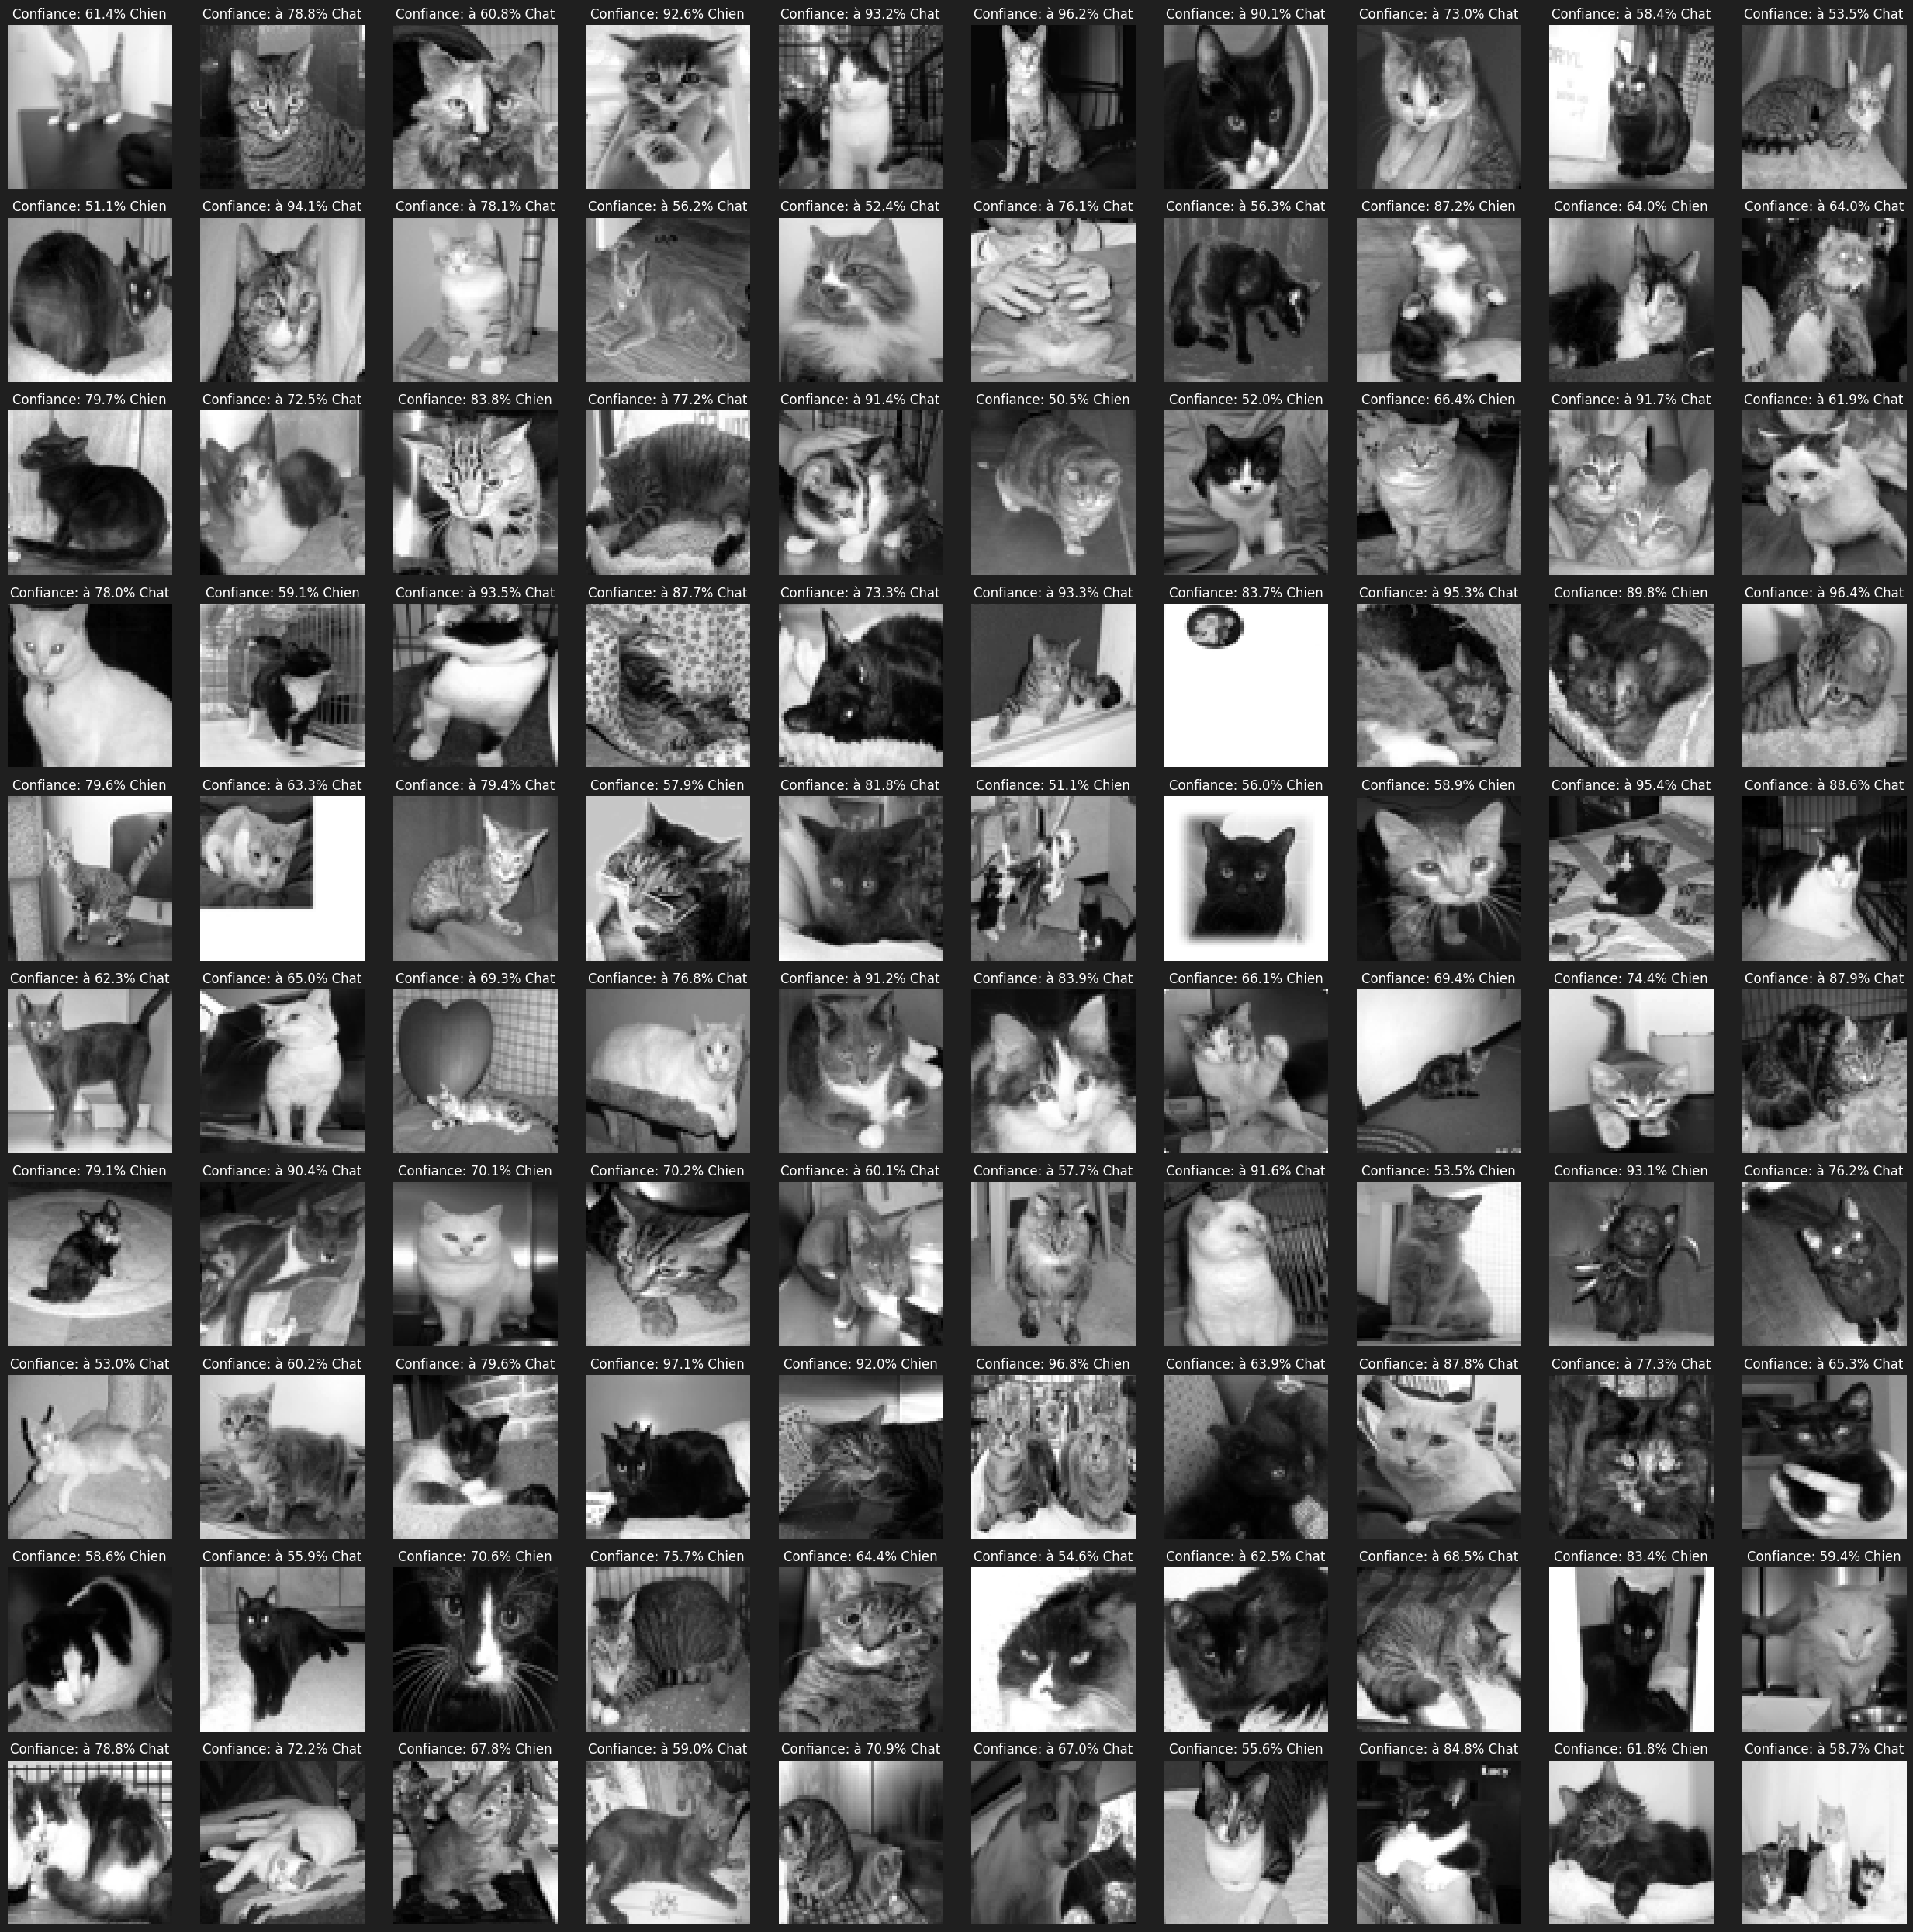

In [120]:
predict_with_probabilities(X_train_reshape,W,b)

In [121]:
predict(X_train_reshape,W,b)

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])